# The Size distribution of Farms (and Firms)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import IFrame
from ipywidgets import interact, fixed

plt.rcParams["figure.figsize"] = (10, 8)
np.set_printoptions(precision=4)

In [2]:
from geqfarm import *
from cd import * 

## Technology 
### Returns to scale

$F(T,L)$ is homogenous of degree $k$ if  $F(\tau T,\tau L) = \tau^k F(T,L)$

$k=1$ :  constant returns (or linear homogenous)

(e.g. double both inputs gives double the output.  $F(2\cdot T,2 \cdot L) = 2^1 F(T,L)$)

Most neoclassical general equilibrium models assume constant returns to scale ($k=1$) or diseconomies of scale ($k<1$), as increasing returns to scale usually lead to market power and other market failures that are considerably harder to analyze.

### Choice of Technique

An **isoquant** is defined as the locus of combinations of labor $T$ and land $T$ such that a given level of output is produced.  For example the $Q=100$ isoquant is defined by $F(T,L) = 100$.  

The interactive diagram below show the isoquant defined by the linear homogenous production function:

$$
A \cdot F(T,L) = A \cdot T^\alpha \cdot L^{1-\alpha} = Q
$$

The minimum cost way to produce output $Q$ is given by:

$$
C(Q) = \min_{T,L} r \cdot T+ w \cdot L    \\
$$

subject to

$$
A \cdot T^\alpha \cdot L^{1-\alpha} = Q
$$

We want to find the lowest isocost line that touches the $Q$ isoquant, as depicted below ([source](https://www.geogebra.org/classic/nrfq7yxr/)).

In [29]:
IFrame('https://www.geogebra.org/material/iframe/id/nrfq7yxr/width/800/height/670/border/888888/sfsb/true/smb/false/stb/false/stbh/false/ai/false/asb/false/sri/false/rc/false/ld/false/sdz/false/ctl/false', 
          width=800, height=600)

#### Factor Demands


FOC for the minimization problem:

$$
w = \lambda \cdot A\cdot F_L   \\
r = \lambda \cdot A\cdot F_T   
$$

Dividing

$$
 \frac{w}{r}  =  \frac{1-\alpha}{\alpha}  \cdot  \frac{T}{L} 
$$

Which we can solve for:

$$
\frac{T}{L} = \frac{\alpha}{1-\alpha} \cdot  \frac{w}{r}  
$$

When the technology is linear homogenous we can only determine the optimal land to labor ratio as a function of relative factor prices.  

In [19]:
def plot_mcac(A=1, a=1/2, k=1, F=0, ax=None):
    if ax is None:
        ax = plt.gca()
    b = k - a
    q = np.linspace(0.5,20,50)
    ax.plot(q, AC(q, A=A, a=a, b=b, F=F))
    ax.plot(q, MC(q, A=A, a=a, b=b))
    ax.set_xlabel(r'$Q$')
    ax.set_ylim(0,30)
    ax.set_xlim(left =0);


**Constant returns to scale:  constant marginal and average cost**

The firms below produce with the Cobb-Douglas technology $Q=  A \cdot T^\alpha \cdot L^{1-\alpha}$ with $\alpha = 0.5$, $\beta = 0.5$.  Assuming no fixed costs, both firms will have constant marginal and average cost curves: doubling output input use and costs and hence leaves average cost unchanged. 

The firm on the left has total factor productivity $A=1$ while the one on the right has TFP $A=1.5$.  In a competitive market the firm on the right would force the firm on the left out of business. 

The optimal scale of production is indeterminate.  Only the optimal choice of technique (the optimal land-laborintensity, given market factor prices $w$ and $r$.

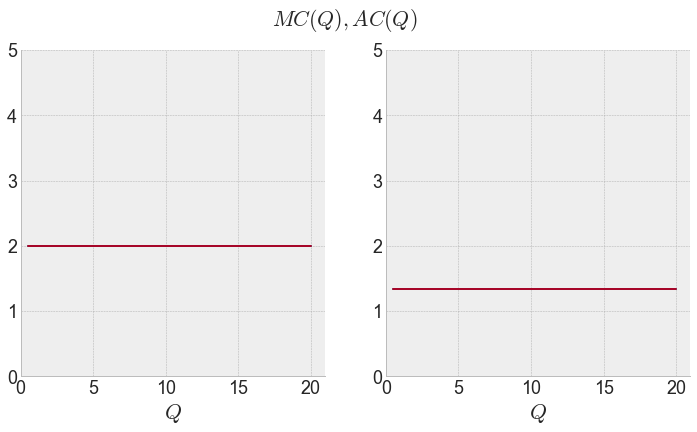

In [34]:
f, ax = plt.subplots(1,2, figsize=(12, 6))
f.suptitle(r'$MC(Q), AC(Q)$')
plot_mcac(A=1, a=1/2, k=1, F=0, ax=ax[0])
plot_mcac(A=1.5, a=1/2, k=1, F=0, ax=ax[1])
ax[0].set_ylim(top=5), ax[1].set_ylim(top=5);

**Economies of Scale**

With the Cobb-Douglas technology $Q=  A \cdot T^\alpha \cdot L^{1-\alpha}$ with $\alpha = 0.75$, $\beta = 0.75$. There will be economies of scale; the degree of homogeneity $k=\alpha+\beta >1$.  The firm on the left has total factor productivity $A=1$ while the one on the right has TFP $A=1.5$. In both cases the fixed cost $F=0$ but marginal and average cost are everywhere declining.

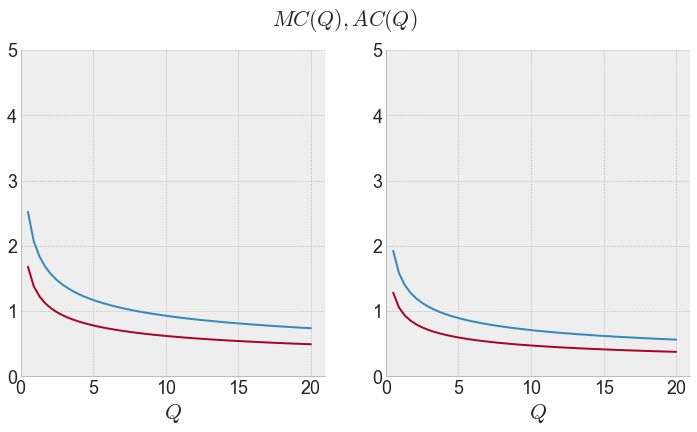

In [33]:
f, ax = plt.subplots(1,2, figsize=(12, 6))
f.suptitle(r'$MC(Q), AC(Q)$')
plot_mcac(A=1, a=3/4, k=1.5, F=0, ax=ax[0])
plot_mcac(A=1.5, a=3/4, k=1.5, F=0, ax=ax[1])
ax[0].set_ylim(top=5), ax[1].set_ylim(top=5);

**Diseconomies of scale:  rising marginal cost**

Firms produce with Cobb-Douglas technology $Q=  A \cdot T^\alpha \cdot L^{1-\alpha}$ with $\alpha = 0.25$, $\beta = 0.25$ (so their are diseconomies of scale; the degree of homogeneity $k=\alpha+\beta <1$.  The firm on the left has total factor productivity $A=1$ while the one on the right has TFP $A=1.5$. In both cases the fixed cost $F=10$ to produce the u-shaped average cost curve.

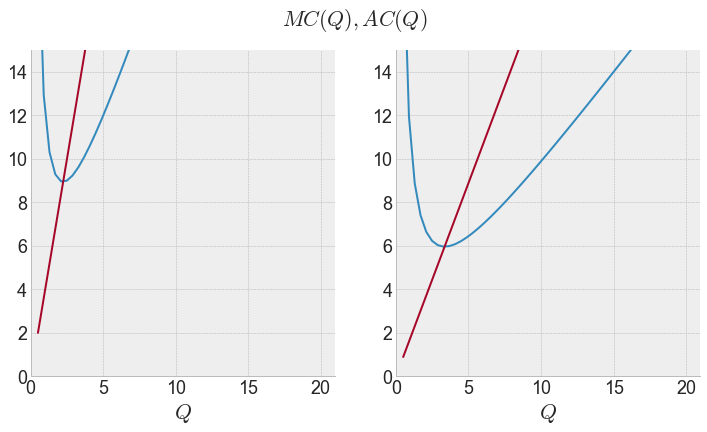

In [31]:
f, ax = plt.subplots(1,2, figsize=(12, 6))
f.suptitle(r'$MC(Q), AC(Q)$')
plot_mcac(A=1, a=1/4, k=1/2, F=10, ax=ax[0])
plot_mcac(A=1.5, a=1/4, k=1/2, F=10, ax=ax[1])
ax[0].set_ylim(top=15), ax[1].set_ylim(top=15);

### Appendix


#### Total Average and Marginal Cost for Cobb Douglass
From the firm's cost minimization problem we can solve for the Cobb-Douglass total cost function:


$$
TC(w, r, Q, A)  = \left ( \frac{Q}{A}  \right )^{\frac{1}{\alpha + \beta}} \cdot w^{\frac{\beta}{\alpha+\beta }} \cdot r^{\frac{\alpha}{\alpha+\beta }} 
\cdot    \left ( \left (  \frac{\beta}{\alpha}\right )^{\frac{\alpha}{\alpha+\beta}} + \left (  \frac{\alpha}{\beta}\right )^{\frac{\beta}{\alpha+\beta}}  \right )
$$